In [1]:
from utils import *
from model import *
from processing import *
from train import *
import argparse


from sklearn.model_selection import KFold

## Set data paths for loading

In [3]:
HR_TRAIN_PATH = 'data-dgl-icl/hr_train.csv'
LR_TRAIN_PATH = 'data-dgl-icl/lr_train.csv'
LR_TEST_PATH = 'data-dgl-icl/lr_test.csv'

## Set model arguments

In [4]:
class Args(argparse.Namespace):
    epochs = 200
    lr = 0.0001
    lmbda = 0.1
    lr_dim = 160
    hr_dim = 320
    hidden_dim = 640
    padding = 26
    double_convolution = True
    dropout = 0.1
    weight_decay = 0
    
args = Args()

## 3 - Fold CV

In [3]:
# Set seeds
SEED = 42
GET_METRICS = True
torch.manual_seed(SEED)
np.random.seed(SEED)

# Perform fold split
kf = KFold(n_splits=3, shuffle=True, random_state=SEED)

# Load Data
subjects_adj, subjects_ground_truth = load_matrix_data(lr_train_path=LR_TRAIN_PATH, hr_train_path=HR_TRAIN_PATH)
test_adj = load_matrix_test(lr_test_path=LR_TEST_PATH)
print("DATA LOADED")

metrics = []

# Run 3-fold CV
for i, (train_index, val_index) in enumerate(kf.split(subjects_adj)):
    print(f"Fold {i+1}:")

    # Initialise model
    model = SuperBLTGraph(args)

    train_labels = create_discrepancy(subjects_ground_truth[train_index], zero_shift = -0.05)

    # Train model
    train(model, subjects_adj[train_index], train_labels, args,
          subjects_adj[val_index], subjects_ground_truth[val_index])
    
    # Generate validation test-fold outputs
    validation_outputs = compute_output_hr(args, subjects_adj[val_index], model)
    create_submision_compatible_csv_save(validation_outputs, f'predictions_fold_{i+1}.csv')

    # Get fold metrics
    if GET_METRICS:
        results = calculate_metrics(subjects_ground_truth[val_index].detach().numpy(), validation_outputs, only_mae=False)
        metrics.append(results)

DATA LOADED
Fold 1:


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21992792189121246 Error:  15.609722705306234 % Validation MAE:  0.17358035
Epoch:  1 Generator Loss:  0.19560470250812736 Error:  13.740863100633966 % Validation MAE:  0.16853146
Epoch:  2 Generator Loss:  0.18500015059032957 Error:  13.234191656381162 % Validation MAE:  0.16429539
Epoch:  3 Generator Loss:  0.17689019186539692 Error:  12.891797600565729 % Validation MAE:  0.16163667
Epoch:  4 Generator Loss:  0.171232393733016 Error:  12.698483406691938 % Validation MAE:  0.1603099
Epoch:  5 Generator Loss:  0.16718451047802832 Error:  12.576547325462908 % Validation MAE:  0.16096464
Epoch:  6 Generator Loss:  0.1631228969440804 Error:  12.385396820467871 % Validation MAE:  0.15825641
Epoch:  7 Generator Loss:  0.16061029616776887 Error:  12.282700252694053 % Validation MAE:  0.15869217
Epoch:  8 Generator Loss:  0.15829594876315142 Error:  12.148388408057324 % Validation MAE:  0.15539119
Epoch:  9 Generator Loss:  0.15673204853728012 Error:  12.0447306549

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21882789763244423 Error:  15.501006269777143 % Validation MAE:  0.18752046
Epoch:  1 Generator Loss:  0.19280946147334468 Error:  13.471406181384852 % Validation MAE:  0.17813084
Epoch:  2 Generator Loss:  0.18226453380004778 Error:  12.981624975129291 % Validation MAE:  0.17349723
Epoch:  3 Generator Loss:  0.17396370006037187 Error:  12.616332573396665 % Validation MAE:  0.16951497
Epoch:  4 Generator Loss:  0.16877373797936482 Error:  12.464736798056611 % Validation MAE:  0.16605212
Epoch:  5 Generator Loss:  0.1636391229726173 Error:  12.23281472250148 % Validation MAE:  0.16425173
Epoch:  6 Generator Loss:  0.1603482223308838 Error:  12.11199680561418 % Validation MAE:  0.162989
Epoch:  7 Generator Loss:  0.15788413986966415 Error:  12.017262559216302 % Validation MAE:  0.1634684
Epoch:  8 Generator Loss:  0.15543883663040023 Error:  11.862570382990278 % Validation MAE:  0.16091557
Epoch:  9 Generator Loss:  0.1551538312488848 Error:  11.89216198819177

/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21851464547216892 Error:  15.462671532960876 % Validation MAE:  0.18521908
Epoch:  1 Generator Loss:  0.19485307498169796 Error:  13.68154582700559 % Validation MAE:  0.17654982
Epoch:  2 Generator Loss:  0.18413895993892634 Error:  13.16238468778985 % Validation MAE:  0.1699313
Epoch:  3 Generator Loss:  0.17633867436753853 Error:  12.850620178505778 % Validation MAE:  0.16849382
Epoch:  4 Generator Loss:  0.17093856393226556 Error:  12.676456257967011 % Validation MAE:  0.1653265
Epoch:  5 Generator Loss:  0.16590618594948733 Error:  12.455179342733961 % Validation MAE:  0.16357744
Epoch:  6 Generator Loss:  0.16229202624942576 Error:  12.302205272551094 % Validation MAE:  0.1617298
Epoch:  7 Generator Loss:  0.15968699354146207 Error:  12.18952397549791 % Validation MAE:  0.16044234
Epoch:  8 Generator Loss:  0.15755270780729397 Error:  12.068467600537199 % Validation MAE:  0.15815629
Epoch:  9 Generator Loss:  0.15548355305301292 Error:  11.915858322754

### Plot cross validation metrics

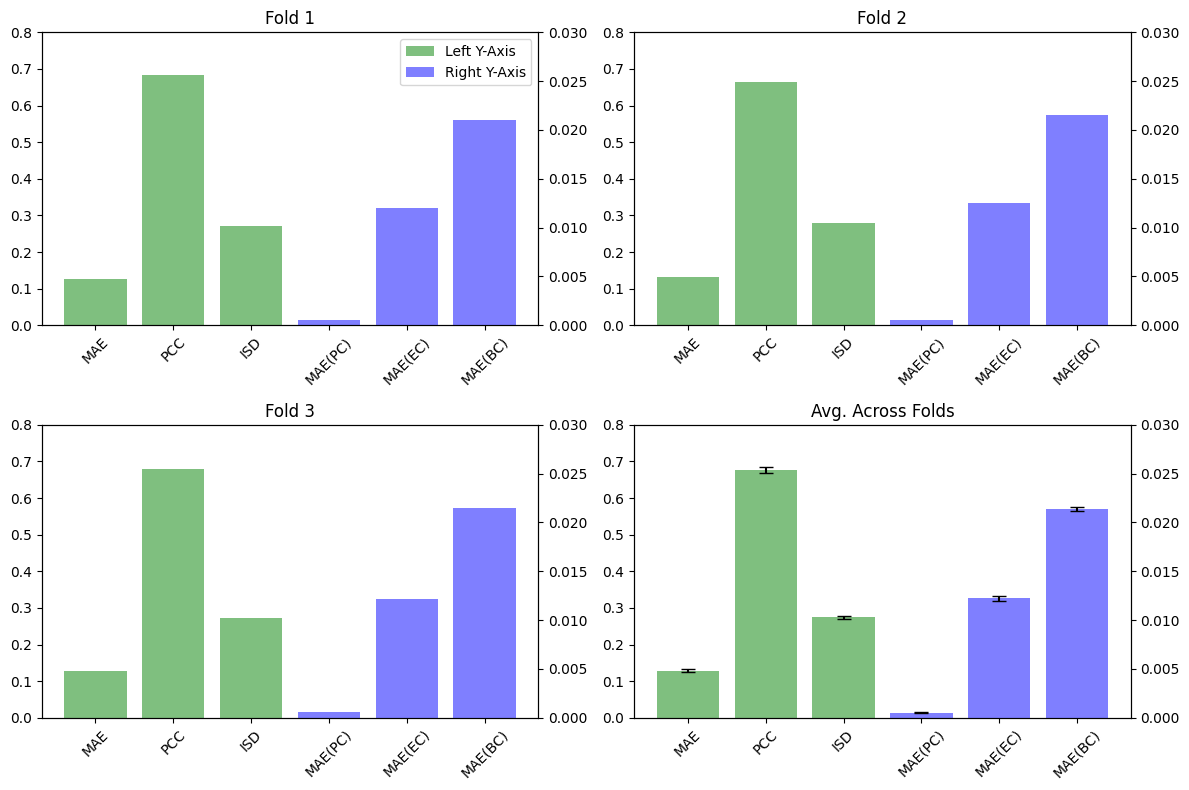

In [4]:
plot_results(data = metrics, filename = '3_fold_results.png')

## Train model on full dataset

In [7]:
from sklearn.model_selection import train_test_split
SEED = 42

subjects_adj, subjects_ground_truth = load_matrix_data(lr_train_path=LR_TRAIN_PATH, hr_train_path=HR_TRAIN_PATH)
test_adj = load_matrix_test(lr_test_path=LR_TEST_PATH)
print("DATA LOADED")

# Splitting the data into training and validation sets
train_adj, val_adj, train_labels, val_labels = train_test_split(
    subjects_adj, subjects_ground_truth, test_size=0.15, random_state=SEED)

# set random numpy and torch seeds
torch.manual_seed(SEED)
np.random.seed(SEED)

# Model
model = SuperBLTGraph(args)

# Augment data
train_labels = create_discrepancy(train_labels, zero_shift=-0.05)

# Train on full dataset
train(model, train_adj, train_labels, args, val_adj=val_adj, val_labels=val_labels)

# Generate a kaggle output
outputs = compute_output_hr(args, test_adj, model)
create_submision_compatible_csv_save(outputs, 'kaggle_competition_submission.csv')

DATA LOADED


/Users/alanpicucci/Desktop/Imperial/DGL/kaggle_project_venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch:  0 Generator Loss:  0.21453817896809138 Error:  15.137685032178325 % Validation MAE:  0.17611727
Epoch:  1 Generator Loss:  0.1905483476659085 Error:  13.458494931882155 % Validation MAE:  0.16874339
Epoch:  2 Generator Loss:  0.17934100033966363 Error:  12.987171879685516 % Validation MAE:  0.16334507
Epoch:  3 Generator Loss:  0.17146248904103084 Error:  12.69389919355406 % Validation MAE:  0.16137701
Epoch:  4 Generator Loss:  0.16540429059495318 Error:  12.445472561298534 % Validation MAE:  0.15912183
Epoch:  5 Generator Loss:  0.1612728847890881 Error:  12.274249315473206 % Validation MAE:  0.15928623
Epoch:  6 Generator Loss:  0.15831224377273667 Error:  12.125983966369155 % Validation MAE:  0.16203958
Epoch:  7 Generator Loss:  0.1557647353368448 Error:  11.943980110875259 % Validation MAE:  0.15348954
Epoch:  8 Generator Loss:  0.15340462411549075 Error:  11.754272957431509 % Validation MAE:  0.1506182
Epoch:  9 Generator Loss:  0.15124145129048233 Error:  11.57207690866